<a href="https://colab.research.google.com/github/VadymKalin/nvidia_certified_associate_generative_ai_llms/blob/main/cars_panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd

df = pd.read_csv("./data/used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [60]:
print(len(df))
print(df.shape)

4009
(4009, 12)


In [61]:
df["model"]

,model
0,Utility Police Interceptor Base
1,Palisade SEL
2,RX 350 RX 350
3,Q50 Hybrid Sport
4,Q3 45 S line Premium Plus
...,...
4004,Continental GT Speed
4005,S4 3.0T Premium Plus
4006,Taycan
4007,F-150 Raptor


In [62]:
df["model_year"]

,model_year
0,2013
1,2021
2,2022
3,2015
4,2021
...,...
4004,2023
4005,2022
4006,2022
4007,2020


In [63]:
df["model_year"].dtype

dtype('int64')

<Axes: >

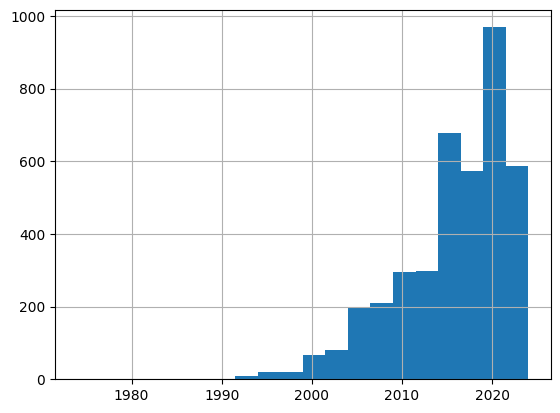

In [64]:
df["model_year"].hist(bins=20)

In [65]:
print(df["model_year"].mean())
print(df["model_year"].min())
print(df["model_year"].max())

2015.515589922674
1974
2024


In [66]:
price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)
print(price < 1000000)


0       True
1       True
2       True
3       True
4       True
        ... 
4004    True
4005    True
4006    True
4007    True
4008    True
Name: price, Length: 4009, dtype: bool


In [67]:
df["brand"] == "Hyundai"

,brand
0,False
1,True
2,False
3,False
4,False
...,...
4004,False
4005,False
4006,False
4007,False


In [68]:
print(df[df["brand"] == "Hyundai"])

        brand                            model  model_year       milage  \
1     Hyundai                     Palisade SEL        2021   34,742 mi.   
25    Hyundai                   Elantra N Base        2022   11,650 mi.   
38    Hyundai                        Tucson SE        2007   16,200 mi.   
84    Hyundai            Sonata Hybrid Limited        2015   66,000 mi.   
90    Hyundai                   Elantra N Base        2023    3,800 mi.   
...       ...                              ...         ...          ...   
3733  Hyundai  Genesis Coupe 3.8 Grand Touring        2013   60,000 mi.   
3798  Hyundai                       Accent GLS        2014  127,941 mi.   
3841  Hyundai        Santa Fe Sport 2.0L Turbo        2018   45,800 mi.   
3863  Hyundai              Elantra HEV Limited        2021   28,600 mi.   
3930  Hyundai                      Santa Fe SE        2007  145,000 mi.   

     fuel_type                                             engine  \
1     Gasoline                

In [69]:
df_ford = df[df[df["brand"] == "Hyundai"] == "Ford"]

In [70]:
print(df_ford["price"].mean())

nan


In [71]:
pd.get_dummies(df["brand"])

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4005,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [73]:
df[["model_year", "price"]]


,model_year,price
0,2013,"$10,300"
1,2021,"$38,005"
2,2022,"$54,598"
3,2015,"$15,500"
4,2021,"$34,999"
...,...,...
4004,2023,"$349,950"
4005,2022,"$53,900"
4006,2022,"$90,998"
4007,2020,"$62,999"


In [74]:
df2 = pd.DataFrame(data={"model_year": [-2, -4, -6], "price": [1, 2, 3]})
print(df2)
df2.corr()

   model_year  price
0          -2      1
1          -4      2
2          -6      3


,model_year,price
model_year,1.0,-1.0
price,-1.0,1.0


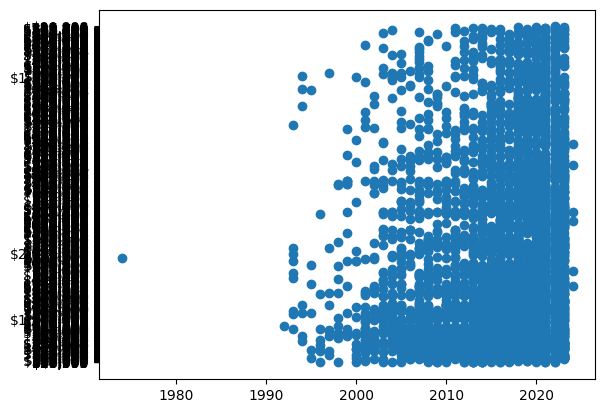

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["model_year"], df["price"])
plt.show()